In [124]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [125]:
CaseName_Base = 'IEEE118_mod1'

Folder_A = 'A.The_full_year_MILP'
Folder_B = 'B.Operation_cost'
Folder_D = 'D.Representative_days_based_on_RES_and_Demand'
Folder_E = 'E.Representative_days_based_on_Line_Benefits_OptModel'
Folder_K = 'K.Investments_per_hour'
Folder_L = 'L.Cont_Investments_per_hour'

Folder_JB = 'J.Full_year_operational_cost\\Results\\B.'
Folder_JD = 'J.Full_year_operational_cost\\Results\\D.'
Folder_JE = 'J.Full_year_operational_cost\\Results\\E.'
Folder_JK = 'J.Full_year_operational_cost\\Results\\K.'
Folder_JL = 'J.Full_year_operational_cost\\Results\\L.'

Folder_JB = 'J.Full_year_operational_cost\\Results\\B.Operation_cost'
Folder_JD = 'J.Full_year_operational_cost\\Results\\D.Representative_days_based_on_RES_and_Demand'
Folder_JE = 'J.Full_year_operational_cost\\Results\\E.Representative_days_based_on_Line_Benefits_OptModel'
Folder_JK = 'J.Full_year_operational_cost\\Results\\K.Investments_per_hour'
Folder_JL = 'J.Full_year_operational_cost\\Results\\L.Cont_Investments_per_hour'

DirName  = os.getcwd()
_path_0 = os.path.join(DirName, CaseName_Base)
category_dict = {Folder_A: "FYMILP",
                 Folder_B: "OPC",
                 Folder_D: "R&D",
                 Folder_E: "OPT_LB",
                 Folder_K: "HI",
                 Folder_L: "CHI",
                 Folder_JB: "OPC_fy",
                 Folder_JD: "R&D_fy",
                 Folder_JE: "OPT_LB_fy",
                 Folder_JK: "HI_fy",
                 Folder_JL: "CHI_fy"
                }

In [126]:
def LoadingData(dir, folder,result, case, ncluster, cm):
    #If the folder is A, the name is slightly different (no ByStages in the name and not dependent on nb clust)
    if folder == 'A.The_full_year_MILP': 
        df = pd.read_csv(os.path.join(dir, folder, case, '3.Out', f'oT_Result_{result}_'+case+'.csv'), index_col=[0,1])
    else: 
        df = pd.read_csv(os.path.join(dir, folder, case+'_ByStages_nc'+str(ncluster), '3.Out', f'oT_Result_{result}_'+case+ '_ByStages_nc'+str(ncluster)+'.csv'), index_col=[0,1])

    df['CaseName'] = folder + ' - ' + case + str(ncluster)
    df['Clustering method'] = cm
    df['Number of clusters'] = ncluster
    df = df.reset_index()

    return df

#Load the weights of the representative periods 
def LoadingWeights(dir, folder, case, ncluster):
    if folder == 'A.The_full_year_MILP': 
        df_stage = pd.read_csv(os.path.join(dir, folder, case, '2.Par', f'oT_Data_Stage_'+case+'.csv'))
        df_duration = pd.read_csv(os.path.join(dir, folder, case, '2.Par', f'oT_Data_Duration_'+case+'.csv'))
    else: 
        df_stage = pd.read_csv(os.path.join(dir, folder, case+'_ByStages_nc'+str(ncluster), '2.Par', f'oT_Data_Stage_'+case+ '_ByStages_nc'+str(ncluster)+'.csv'))
        df_duration = pd.read_csv(os.path.join(dir, folder, case+'_ByStages_nc'+str(ncluster), '2.Par', f'oT_Data_Duration_'+case+ '_ByStages_nc'+str(ncluster)+'.csv'))
    durations_filtered = df_duration[df_duration['Duration'] == 1]
    merged_df = pd.merge(df_stage, durations_filtered, left_on='Unnamed: 0', right_on='Stage', how='left')

    return merged_df

In [127]:
nbs_clusters = [(i+1)*10 for i in range(10)] + [150, 200, 250, 300,350, 400]
nbs_clusters = [(i+1)*10 for i in range(10)]+ [150, 200, 250, 300,350, 400]

#folders = [Folder_JB, Folder_JD,Folder_JE,Folder_JL]#,Folder_E,Folder_F,Folder_G]
folders = [Folder_A,Folder_B,Folder_D,Folder_E,Folder_L,Folder_K]
#folders = [Folder_A,Folder_L,Folder_JL,Folder_D,Folder_JD,Folder_B,Folder_JB,Folder_E,Folder_JE]
results = ["NetworkUtilizationPerNode_DC"]

results_dfs = dict()
weights_dfs = dict()
results_w_dfs = dict()
for result in results :
    results_dfs[result] = dict()
    weights_dfs[result] = dict()
    results_w_dfs[result] = dict()
    for folder in folders: 
        results_dfs[result][folder] = dict()
        results_w_dfs[result][folder] = dict()
        weights_dfs[result][folder] = dict()
        for nb_clusters in nbs_clusters:
            try: 
                results_dfs[result][folder][nb_clusters] = LoadingData(DirName, folder,result, CaseName_Base, nb_clusters, category_dict[folder])
                if not(folder.startswith("J")):
                    weights_dfs[result][folder][nb_clusters] = LoadingWeights(DirName,folder,CaseName_Base,nb_clusters)
                    results_w_dfs[result][folder][nb_clusters] = results_dfs[result][folder][nb_clusters].merge(weights_dfs[result][folder][nb_clusters][["LoadLevel","Weight"]],on= "LoadLevel")
                                        
            except FileNotFoundError as e : 
                print(e)
                print(folder,nb_clusters, "Does not contain", result)

[Errno 2] No such file or directory: 'C:\\Users\\u0138303\\OneDrive - KU Leuven\\JointResearch\\05. Models\\06.Benchmarking\\A.The_full_year_MILP\\IEEE118_mod1\\3.Out\\oT_Result_NetworkUtilizationPerNode_DC_IEEE118_mod1.csv'
A.The_full_year_MILP 10 Does not contain NetworkUtilizationPerNode_DC
[Errno 2] No such file or directory: 'C:\\Users\\u0138303\\OneDrive - KU Leuven\\JointResearch\\05. Models\\06.Benchmarking\\A.The_full_year_MILP\\IEEE118_mod1\\3.Out\\oT_Result_NetworkUtilizationPerNode_DC_IEEE118_mod1.csv'
A.The_full_year_MILP 20 Does not contain NetworkUtilizationPerNode_DC
[Errno 2] No such file or directory: 'C:\\Users\\u0138303\\OneDrive - KU Leuven\\JointResearch\\05. Models\\06.Benchmarking\\A.The_full_year_MILP\\IEEE118_mod1\\3.Out\\oT_Result_NetworkUtilizationPerNode_DC_IEEE118_mod1.csv'
A.The_full_year_MILP 30 Does not contain NetworkUtilizationPerNode_DC
[Errno 2] No such file or directory: 'C:\\Users\\u0138303\\OneDrive - KU Leuven\\JointResearch\\05. Models\\06.Benc

In [128]:
# Initialize DataFrames to store results
overal_avg_utilization = pd.DataFrame()
all_utils = pd.DataFrame()
i = 0

# Loop through each folder and number of clusters
for folder in folders:
    print(folder)
    for nb_clusters in nbs_clusters:
        # Concatenate the individual results to the all_utils DataFrame
        #all_utils = pd.concat([all_utils, results_dfs[result][folder][nb_clusters]])
        all_utils = pd.concat([all_utils, results_w_dfs[result][folder][nb_clusters]])


A.The_full_year_MILP


KeyError: 10

In [97]:
selected_nbs = [10]#,100,200]
selected_cms = ["OPC","R&D","CHI","HI","OPT_LB"]
selected_cms_w = ["OPC","R&D","CHI","HI","OPT_LB","FYMILP"]
filter_ = all_utils["Number of clusters"].isin(selected_nbs) &  all_utils["Clustering method"].isin(selected_cms)
filter_w = all_utils["Number of clusters"].isin(selected_nbs) &  all_utils["Clustering method"].isin(selected_cms_w)

<Axes: xlabel='GWh', ylabel='Density'>

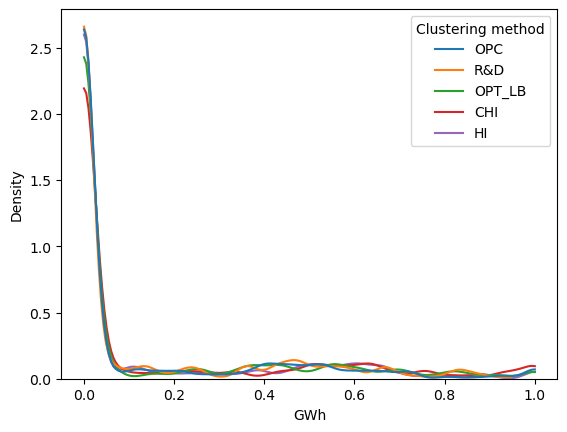

In [100]:
all_utils_sel = all_utils[filter_]
sns.kdeplot(data = all_utils_sel,x = "GWh",hue = "Clustering method",cut=0,bw_adjust=0.3)

<Axes: xlabel='GWh', ylabel='Density'>

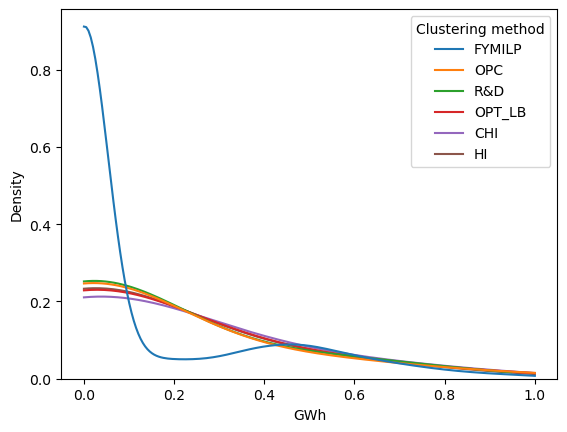

In [102]:
selected_nbs = [10]#,100,200]
selected_cms_w = ["OPC","R&D","CHI","HI","OPT_LB","FYMILP"]
filter_w = all_utils["Number of clusters"].isin(selected_nbs) &  all_utils["Clustering method"].isin(selected_cms_w)
all_utils_sel = all_utils[filter_w]
sns.kdeplot(data = all_utils_sel,x = "GWh",hue = "Clustering method",cut = 0,bw_adjust=3,weights="Weight")

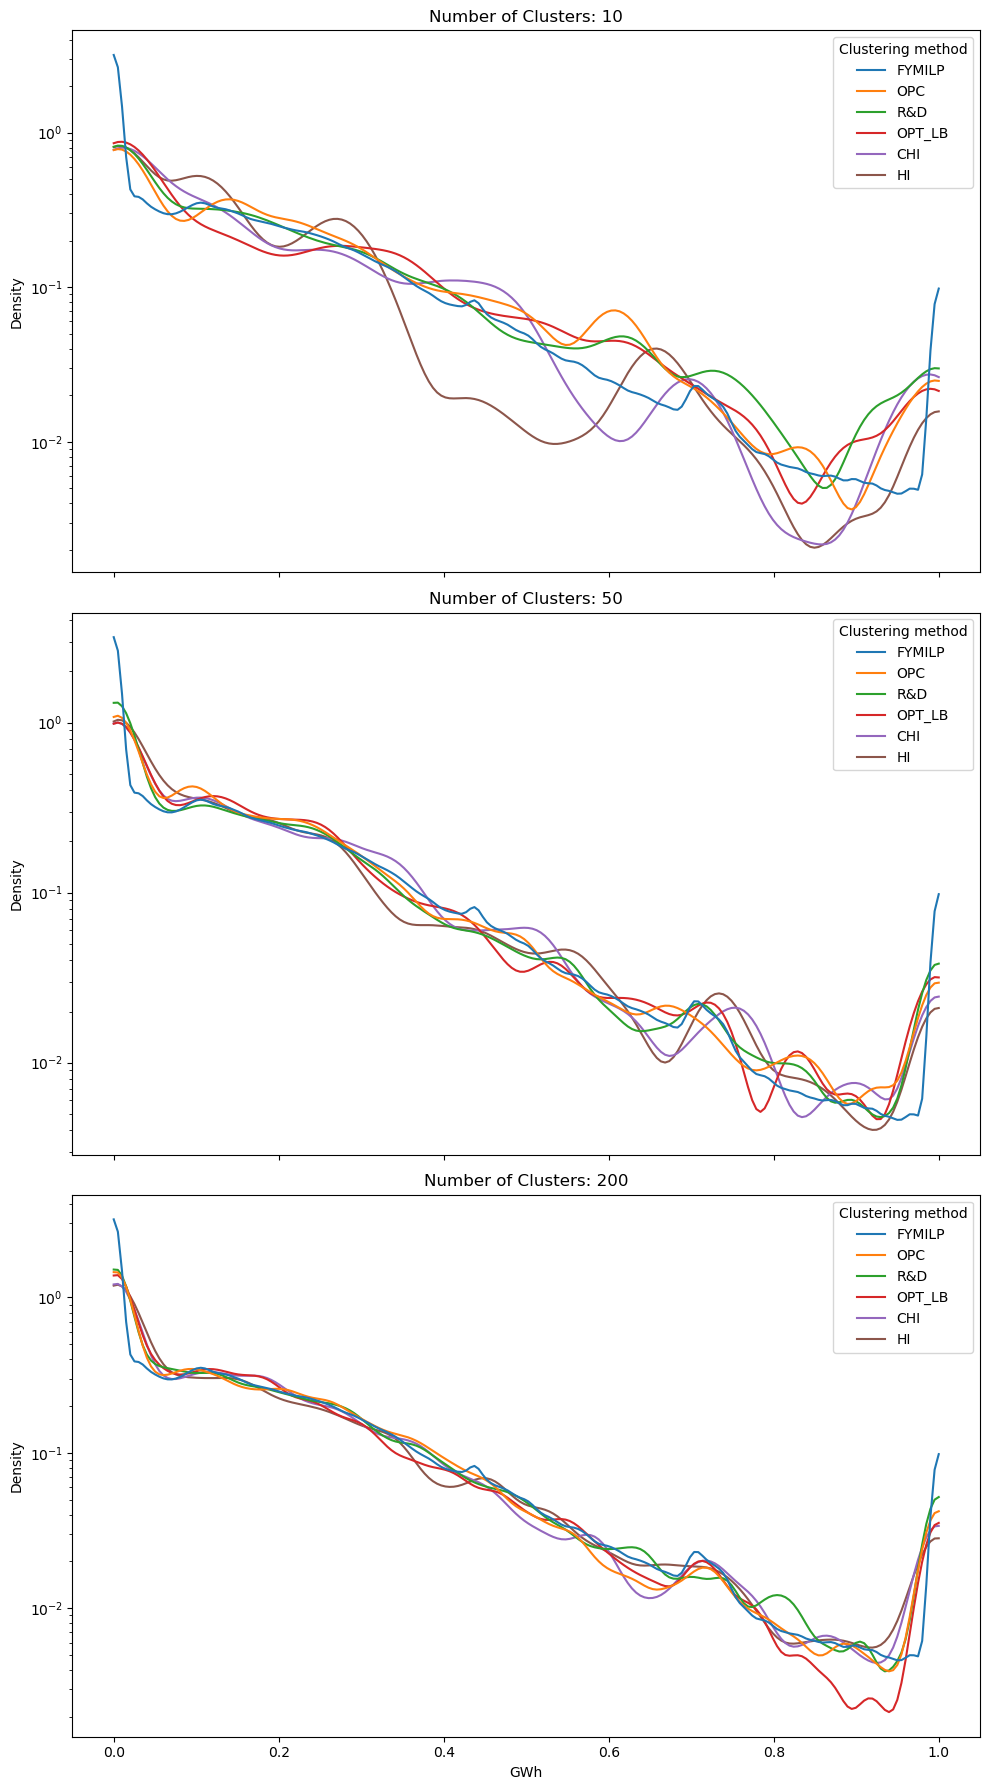

In [123]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example data creation (Replace this with your actual DataFrame)
# all_utils = pd.DataFrame({
#     'Number of clusters': [...],
#     'Clustering method': [...],
#     'GWh': [...],
#     'Weight': [...]
# })

# Define the selected numbers of clusters and clustering methods
selected_nbs = [10, 50, 200]
selected_cms_w = ["OPC", "R&D", "CHI", "HI", "OPT_LB", "FYMILP"]

# Create subplots
fig, axes = plt.subplots(len(selected_nbs), 1, figsize=(10, 6 * len(selected_nbs)), sharex=True)

# Create a KDE plot for each selected number of clusters
for ax, nbs in zip(axes, selected_nbs):
    filter_w = all_utils["Number of clusters"].isin([nbs]) & all_utils["Clustering method"].isin(selected_cms_w)
    all_utils_sel = all_utils[filter_w]
    sns.kdeplot(data=all_utils_sel, x="GWh", hue="Clustering method", cut=0, bw_adjust=0.5, weights=all_utils_sel["Weight"], ax=ax)
    ax.set_yscale('log')  # Set y-axis to logarithmic scale
    ax.set_title(f'Number of Clusters: {nbs}')

# Adjust layout
plt.tight_layout()
plt.show()


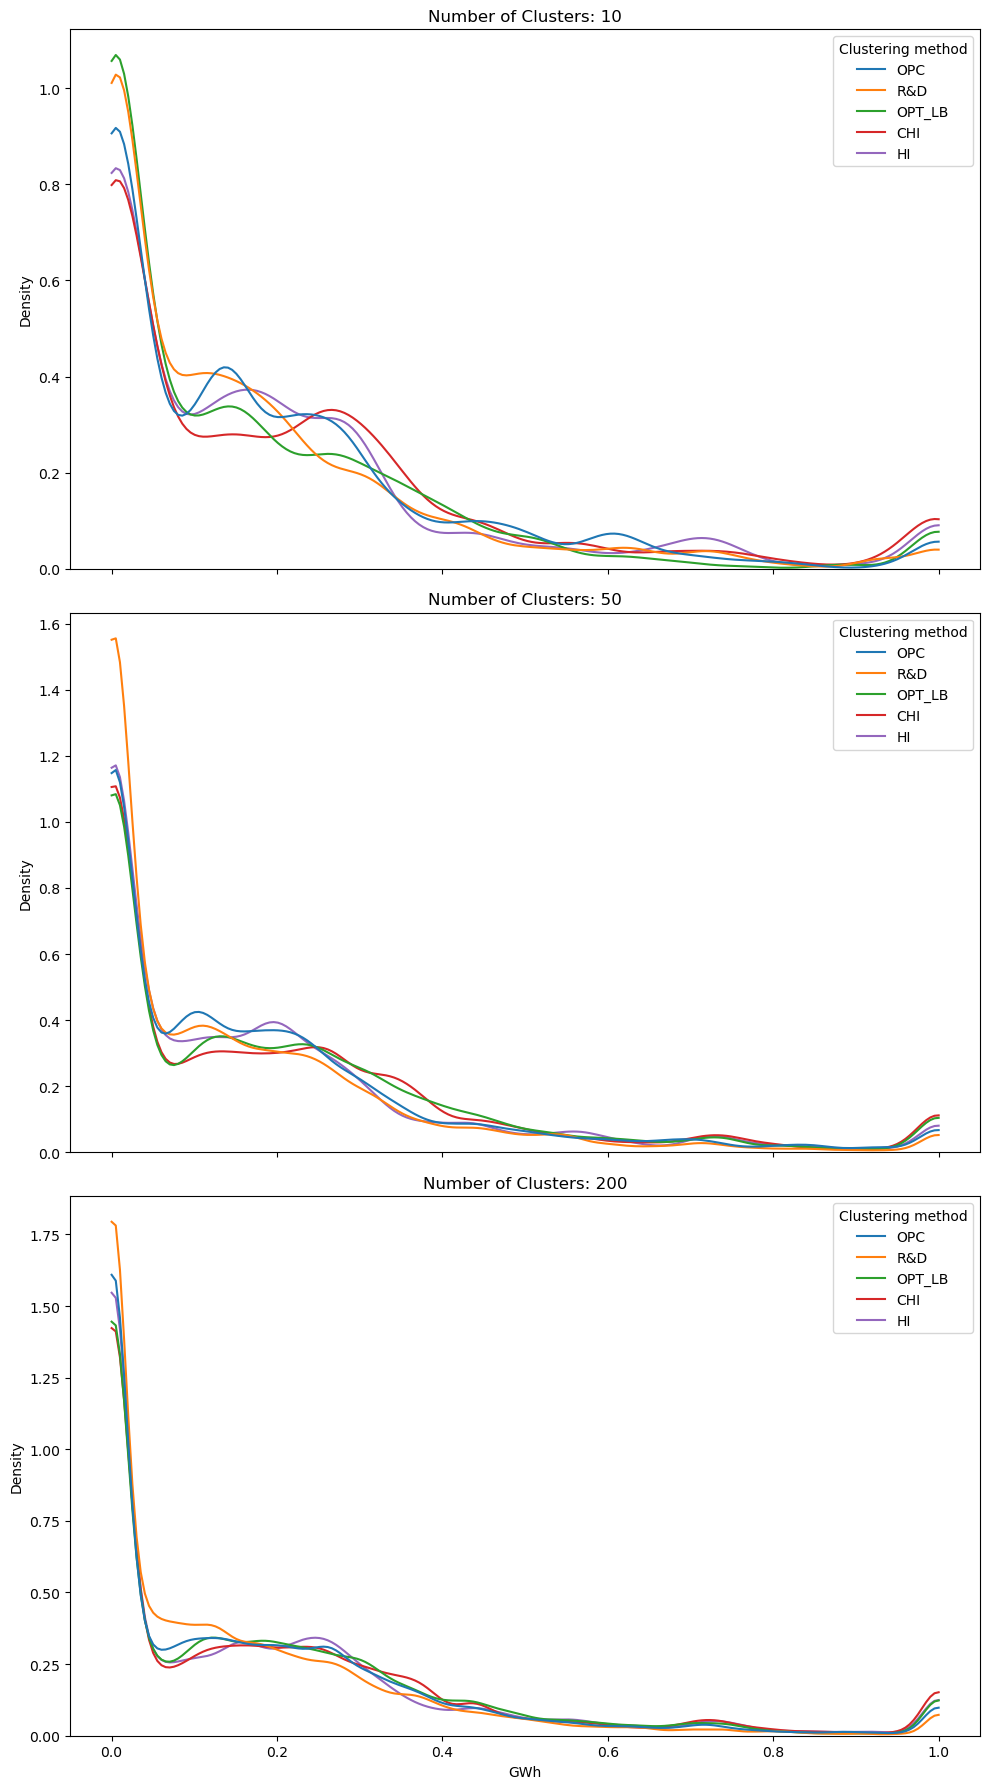

In [120]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example data creation (Replace this with your actual DataFrame)
# all_utils = pd.DataFrame({
#     'Number of clusters': [...],
#     'Clustering method': [...],
#     'GWh': [...],
#     'Weight': [...]
# })

# Define the selected numbers of clusters and clustering methods
selected_nbs = [10, 50, 200]
selected_cms_w = ["OPC", "R&D", "CHI", "HI", "OPT_LB"]

# Create subplots
fig, axes = plt.subplots(len(selected_nbs), 1, figsize=(10, 6 * len(selected_nbs)), sharex=True)

# Create a KDE plot for each selected number of clusters
for ax, nbs in zip(axes, selected_nbs):
    filter_w = all_utils["Number of clusters"].isin([nbs]) & all_utils["Clustering method"].isin(selected_cms_w)
    all_utils_sel = all_utils[filter_w]
    sns.kdeplot(data=all_utils_sel, x="GWh", hue="Clustering method", cut=0, bw_adjust=0.5, ax=ax)
    #ax.set_yscale('log')  # Set y-axis to logarithmic scale
    ax.set_title(f'Number of Clusters: {nbs}')

# Adjust layout
plt.tight_layout()
plt.show()